In [94]:
# Import the packages needed for analysis

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
from scipy import stats

In [63]:
# import the data

marketing=pd.read_csv(r"C:\Users\Ricardo S. Biason\OneDrive\Ric\DataCamp\Marketing Analytics for Python\Analyzing Marketing Campaigns with pandas\2 Exploratory Analysis & Summary Statistics\marketing.csv")


marketing.head(n=15)

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True
5,a100000034,1/1/18,House Ads,personalization,True,German,German,45-55 years,1/1/18,NaN,House Ads,True
6,a100000035,1/1/18,House Ads,personalization,True,English,English,55+ years,1/1/18,NaN,House Ads,True
7,a100000036,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
8,a100000037,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
9,a100000038,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True


In [64]:
# Check how many columns and rows are in the data

marketing.shape

(10037, 12)

## Test allocation

The email portion of the campaign was actually run as an A/B test. Half the emails sent out were generic upsells to the product while the other half contained personalized messaging around the users’ usage of the site.

Before we begin analyzing the results, we will check to ensure users were allocated equally to the test and control groups.

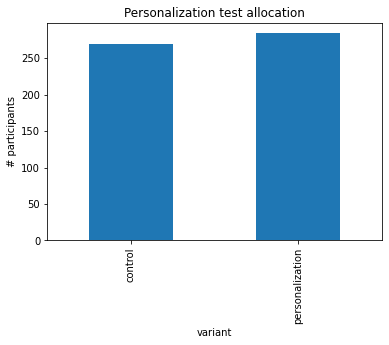

In [66]:
# Subset the DataFrame
email = marketing[marketing['marketing_channel'] == 'Email']

# Group the email DataFrame by variant 
alloc = email.groupby(['variant'])['user_id'].nunique()

# Plot a bar chart of the test allocation
alloc.plot(kind='bar')
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

## Comparing conversion rates

Now that we know allocation is relatively even let's look at the conversion rate for the control and personalization. Since we chose conversion rate as our key metrics for this test, it is highly important that we evaluate whether or not conversion was higher in the personalization treatment compared with the control. While we will dive in deeper in subsequent exercises, measuring the difference between the key metric in the control and the treatment is the most important part of evaluating the success of an A/B test.

In [67]:
# Setting up our data to evaluate the test
# Group marketing by user_id and variant

subscribers = email.groupby(['user_id','variant'])['converted'].max()

subscribers = pd.DataFrame(subscribers.unstack(level=1))

In [68]:
subscribers.describe()

variant,control,personalization
count,270,284
unique,2,2
top,False,False
freq,194,173


In [69]:
# Setting up our data to evaluate the test
# Drop missing values from the control column

control = subscribers['control'].dropna()

# Drop missing values from the personalization column

personalization = subscribers['personalization'].dropna()

In [70]:
# Conversion rates

print("Control Conversion rate:",np.mean(control))

print("Personalization conversion rate:",np.mean(personalization))

Control Conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


## Calculating lift & significance testing

"what's the lift?". In this case, what this means is, "Was the conversion rate higher for the treatment and by how much?"

Treatment performance compared to the control
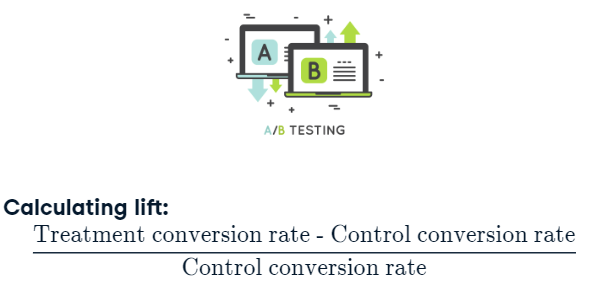

In [71]:
# Calculating lift and creating a function for lift

def lift(control, personalization):

    # Calculate the mean of a and b

    a_mean = np.mean(control)
    b_mean = np.mean(personalization)

# Calculate the lift using a_mean and b_mean
    lift = (b_mean-a_mean)/a_mean
    
    return str(round(lift*100,2)) + '%'


print("lift:",lift(control, personalization))

lift: 38.85%


In [72]:
print(a_mean)
print(b_mean)

0.2814814814814815
0.3908450704225352


## T-distribution

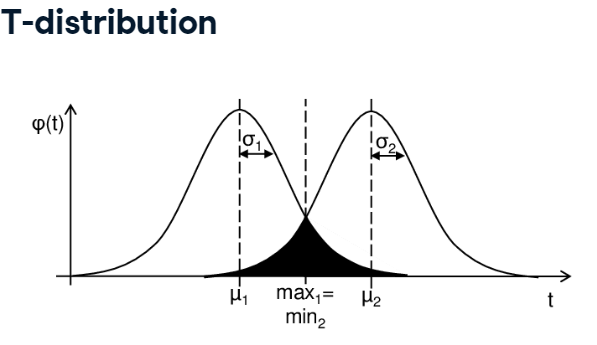
One way to calculate statistical significance is by conducting a two-sample t-test. A t-test uses the mean and the sample variance to determine the likelihood that the variation between the two samples occurred by chance. The image on the slide shows two overlapping sample distributions. The smaller the overlap between the two distributions, the more likely that there is a true difference between the two samples. I'm not going to explain the details of the t-test, but I highly recommend you do further research if you plan to run these tests at work.

## P-values

The t-test gives us a t-statistic and a p-value which allows us to estimate the likelihood of finding a result at least as extreme as the treatment in our test. While it depends on sample size and the test, typically a t-statistic of 1.96 evaluates to a p-value of 0.05, which translates to a 95% significance level, a commonly used threshold for significance tests.

We can utilize the control and personalization Series we created in the list of outcomes. This conveniently gives us both a 
t-statistic and a p-value. Remember, a p-value less than 0.05 is typically considered statistically significant at 95% significance level. Since the p-value here is indeed less than 0.05, we can be confident that the difference in conversion rates is statistically significant.

In [73]:
t = ttest_ind(control, personalization)
print(t)

Ttest_indResult(statistic=-2.7343299447505074, pvalue=0.0064514878446941745)


The results are statistically significant with p = 0.006.



## A/B testing & segmentation

One of the most common pitfalls in A/B testing is assuming that a treatment equally affects everyone in a population.

We should not forget about segmentation !

Just like with any other kind of marketing, some treatments are particularly effective on users of a specific engagement level, age, race, or any other of a number of factors. It is important to break down results by various demographics in order to obtain a holistic understanding of the impact of the test. Not all customers are alike!

The primary challenge of segmentation is figuring out the best way to avoid repetitive work. In this lesson, we will use for loops to calculate lift and statistical significance across multiple segments of users. We begin by looping through all languages in the language_displayed column using numpy's unique() function and printing the language we are evaluating in this loop for reference.

In [87]:
# Personalization test segmented by language

for language in np.unique(marketing['language_displayed'].values):
    print(language)

Arabic
English
German
Spanish


In [88]:
# Isolate relevant data
# we need to remake our dataset each time to 
# isolate the data for only the selected language in each loop.

language_data = marketing[(marketing['marketing_channel'] == 'Email') & 
                          (marketing['language_displayed'] == language)]

language_data.head(15)

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
490,a100000645,1/15/18,Email,personalization,True,Spanish,Spanish,0-18 years,1/15/18,NaN,Email,True
494,a100000649,1/15/18,Email,personalization,True,Spanish,Spanish,0-18 years,1/15/18,NaN,Email,True
500,a100000655,1/15/18,Email,personalization,True,Spanish,Spanish,24-30 years,1/15/18,NaN,Email,True
531,a100000686,1/16/18,Email,personalization,True,Spanish,Spanish,19-24 years,1/16/18,NaN,Email,True
4172,a100002386,1/15/18,Email,control,True,Spanish,English,30-36 years,NaN,NaN,NaN,NaN
4188,a100002394,1/15/18,Email,control,False,Spanish,Spanish,45-55 years,NaN,NaN,NaN,NaN
4202,a100002401,1/15/18,Email,control,True,Spanish,Spanish,0-18 years,NaN,NaN,NaN,NaN
4218,a100002409,1/15/18,Email,control,False,Spanish,Spanish,24-30 years,NaN,NaN,NaN,NaN
4232,a100002416,1/15/18,Email,control,False,Spanish,Spanish,30-36 years,NaN,NaN,NaN,NaN
4250,a100002425,1/15/18,Email,control,False,Spanish,Spanish,0-18 years,NaN,NaN,NaN,NaN


In [89]:
# Isolate subscribers 
# we ensure each user and variant has only one subscription 
# outcome by using the groupby() and max() methods

subscribers = language_data.groupby(['user_id', 'variant'])['converted']\
.max()

print(subscribers)

user_id     variant        
a100000645  personalization     True
a100000649  personalization     True
a100000655  personalization     True
a100000686  personalization     True
a100002386  control             True
a100002394  control            False
a100002401  control             True
a100002409  control            False
a100002416  control            False
a100002425  control            False
a100002434  control             True
a100002442  control            False
Name: converted, dtype: bool


In [90]:
# we unstack the DataFrame and create a Series of outcomes for both 
# the control and the personalization variants by dropping all missing values.

subscribers = pd.DataFrame(subscribers.unstack(level=1))
control = subscribers['control'].dropna()
personalization = subscribers['personalization'].dropna()

In [95]:
print('lift:', lift(control, personalization))
print('t-statistic:', stats.ttest_ind(control, personalization), '\n\n')

lift: 166.67%
t-statistic: Ttest_indResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524) 




Since you want to segment our data multiple times, we will build a function ab_segmentation() that analyzes the impact of our A/B tests on segments of data that we can reuse each time we want to conduct this kind of analysis.

Our function will take in a column name and run through each unique value in that column calculating lift and statistical significance.

In [100]:
def ab_segmentation(segment):
  # Build a for loop for each segment in marketing
  for subsegment in np.unique(marketing[segment].values):
      print(subsegment)
      
      # Limit marketing to email and subsegment      
      email = marketing[(marketing['marketing_channel'] == 'Email') & (marketing[segment] == subsegment)]

      subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
      subscribers = pd.DataFrame(subscribers.unstack(level=1)) 
      control = subscribers['control'].dropna()
      personalization = subscribers['personalization'].dropna()

      print('lift:', lift(control, personalization))
      print('t-statistic:', stats.ttest_ind(control, personalization), '\n\n')

## Using your segmentation function

Now that we've generated an ab_segmentation() function, it's time to test it out.

Often a treatment will not affect all people uniformly. Some people will love a particular marketing campaign while others hate it. As a marketing data scientist, it's our responsibility to enable our marketing stakeholders to target users according to their preferences.

We will run through two segments in our data that may be relevant to assessing the impact of our test.

In [98]:
ab_segmentation('language_displayed')

Arabic
lift: 50.0%
t-statistic: Ttest_indResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001) 


English
lift: 39.0%
t-statistic: Ttest_indResult(statistic=-2.2183598646203166, pvalue=0.026991701290720815) 


German
lift: -1.62%
t-statistic: Ttest_indResult(statistic=0.1910083418078718, pvalue=0.8494394170062678) 


Spanish
lift: 166.67%
t-statistic: Ttest_indResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524) 




As you can see, the test performed very well among English,(pvalue=0.026991701290720815) and Spanish speakers (pvalue=0.040156718110477524), while the other language's results are not statistically significant. These are the kinds of differences across groups that are crucial to keep an eye out for.

Often a treatment will not affect all people uniformly. Some people will love a particular marketing campaign while others hate it. As a marketing data scientist, it's your responsibility to enable your marketing stakeholders to target users according to their preferences.

We will run through two segments in our data that may be relevant to assessing the impact of our test.

In [99]:
# Run ab_segmentation on age group

ab_segmentation('age_group')

0-18 years
lift: 121.4%
t-statistic: Ttest_indResult(statistic=-2.966044912142211, pvalue=0.0038724494391297226) 


19-24 years
lift: 106.24%
t-statistic: Ttest_indResult(statistic=-3.03179438478667, pvalue=0.0030623836114689134) 


24-30 years
lift: 161.19%
t-statistic: Ttest_indResult(statistic=-3.861539544326876, pvalue=0.00018743381094867335) 


30-36 years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.1859064644147996, pvalue=0.0023238487431765137) 


36-45 years
lift: -85.23%
t-statistic: Ttest_indResult(statistic=2.4317901279318503, pvalue=0.017975686009788286) 


45-55 years
lift: -72.22%
t-statistic: Ttest_indResult(statistic=2.065499127317933, pvalue=0.043062339688201196) 


55+ years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.3265654564203397, pvalue=0.0016358623456360435) 




Based on the p-values of each segment below which is indeed less than 0.05, we can be confident that the test is statistically significant for a particular segment.

0-18 years
lift: 121.4%
t-statistic: Ttest_indResult(statistic=-2.966044912142211, pvalue=0.0038724494391297226) 


19-24 years
lift: 106.24%
t-statistic: Ttest_indResult(statistic=-3.03179438478667, pvalue=0.0030623836114689134) 


24-30 years
lift: 161.19%
t-statistic: Ttest_indResult(statistic=-3.861539544326876, pvalue=0.00018743381094867335) 